In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("D:/ETL HIVE/PYTHON/ADV PY/Cars93.csv")

In [5]:
df

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,NaN,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,NaN,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,NaN,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


<Axes: >

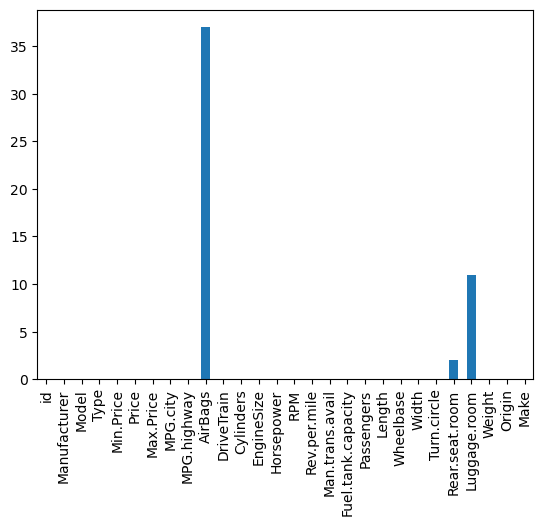

In [7]:
df.isna().sum().plot(kind='bar')

In [9]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())
    

<Axes: >

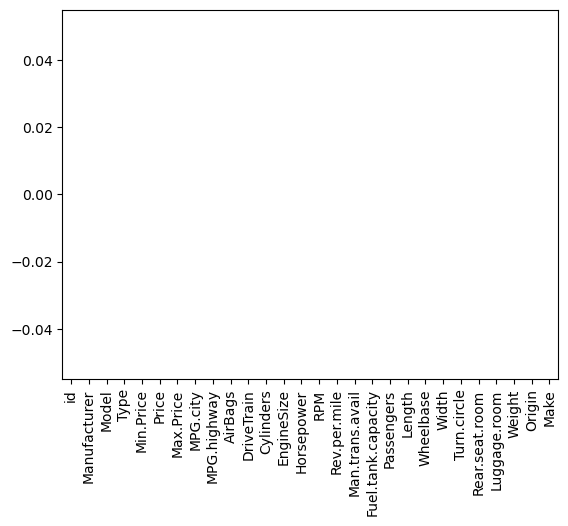

In [11]:
df.isna().sum().plot(kind='bar')

In [13]:
X = df.drop('EngineSize',axis=1)

In [15]:
Y = df[['EngineSize']]


In [19]:
cat = []
con = []

for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)

In [21]:
Xcat = X [cat]
Xcon = X [con]

In [23]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [27]:
le = LabelEncoder()
ss = StandardScaler()

In [29]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [31]:
Xcon = pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [33]:
Xcon


,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,-1.713526,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.073484,1.717489,1.129530,-1.062184,-0.083243,-0.427186,-0.286932,-0.366184,-0.610436,-0.452197,-1.033015,-0.627055
1,-1.676275,1.388017,1.497844,1.531409,-0.781032,-0.770514,1.078322,0.369586,0.005661,0.409445,-0.083243,0.812171,1.629649,0.431983,-0.298510,0.738090,0.396643,0.830208
2,-1.639025,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.540813,0.369586,-0.105713,0.072197,-0.083243,-0.220626,-0.286932,-0.632239,-0.610436,0.057926,0.039228,0.514894
3,-1.601774,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.540813,0.369586,0.410659,1.359872,0.884457,0.674465,0.302785,0.165927,-0.610436,1.078172,1.111472,0.566026
4,-1.564523,0.755752,1.091905,1.303535,-0.065407,0.172352,1.231897,0.706562,0.430909,1.359872,-1.050944,0.192493,0.745073,-0.100128,0.013416,-0.282156,-0.318186,0.966560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1.564523,-0.060445,0.019810,0.073018,-0.959938,-1.524806,-0.668585,-1.315292,1.180155,1.359872,1.852158,0.261346,1.629649,0.698038,-0.298510,2.098419,0.000000,1.511968
89,1.601774,0.054512,0.051036,0.045673,-0.244313,0.172352,-0.188665,0.875050,0.714407,0.562740,-0.083243,-0.220626,-0.139503,-0.632239,-1.234288,1.248213,0.039228,-0.149822
90,1.639025,0.663786,0.394523,0.164167,-0.781032,-0.770514,0.655993,0.875050,0.106911,0.562740,-1.050944,-1.666543,-1.024079,-0.898295,-0.922362,-0.622238,0.396643,-0.448092
91,1.676275,0.537333,0.332071,0.145937,-0.244313,-0.204794,-0.572601,0.201098,-0.237337,-0.265051,-0.083243,0.467905,0.007926,-0.632239,-0.610436,0.568049,0.039228,-0.149822


In [35]:
X = Xcon.join(Xcat)


In [52]:
out =[]

for i in Xcon.columns:
    o = Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
    out.extend(o)

In [54]:
out

[47, 58, 58, 58, 38, 41, 38, 41, 16, 59]

In [106]:
a = list(set(out))
a

[38, 41, 47, 16, 58, 59]

In [108]:
X = X.drop(index=a,axis=0)
Y = Y.drop(index=a,axis=0)

In [152]:
X.index=range(X.shape[0])
Y.index=range(Y.shape[0])

In [156]:
Y.shape

(87, 1)

In [160]:
X.shape

(87, 27)

In [162]:
from sklearn.model_selection import train_test_split

In [164]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,train_size=0.2,random_state=42)

In [166]:
from sklearn.linear_model import LinearRegression

In [168]:
lr = LinearRegression()

In [172]:
model = lr.fit(xtrain,ytrain)

In [174]:
tr_pred = model.predict(xtrain)
tr_pred

array([[3. ],
       [3.8],
       [2.2],
       [1.6],
       [1.3],
       [3.2],
       [1.3],
       [1.5],
       [2.8],
       [2.5],
       [1.8],
       [1.8],
       [3.3],
       [3. ],
       [2.1],
       [2.2],
       [3. ]])

In [176]:
ts_pred = model.predict(xtest)
ts_pred

array([[0.88881681],
       [1.90097509],
       [3.07685314],
       [2.17783084],
       [3.14491546],
       [2.30251251],
       [3.55533726],
       [3.75361001],
       [3.60414334],
       [4.47557501],
       [1.96555041],
       [3.48530057],
       [2.60184105],
       [3.2751166 ],
       [1.46547306],
       [3.59994903],
       [1.8531354 ],
       [3.1000825 ],
       [1.88906929],
       [1.33246144],
       [3.23707643],
       [1.47393967],
       [2.15692728],
       [2.8387456 ],
       [4.2562591 ],
       [1.03862018],
       [2.84054173],
       [4.01130914],
       [2.88399328],
       [1.83115988],
       [3.46458549],
       [3.37786641],
       [4.42667125],
       [1.71420761],
       [4.75263219],
       [4.15503013],
       [2.29077026],
       [2.56486382],
       [3.68063092],
       [2.86209748],
       [2.98865087],
       [2.88239433],
       [4.99284339],
       [3.5901063 ],
       [2.84394309],
       [4.46362649],
       [3.42262163],
       [3.363

In [178]:
from sklearn.metrics import r2_score

In [180]:
tr_score = r2_score(ytrain,tr_pred)
tr_score

1.0

In [182]:
ts_score = r2_score(ytest,ts_pred)
ts_score

0.4599294573864575

In [184]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [379]:
df = pd.read_csv("D:/ETL HIVE/PYTHON/ADV PY/Cars93.csv")

In [381]:
# EDA(Explortary data analysis)


In [383]:
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [387]:
df.describe()

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


# univariate analysis

## histogram >> distribution of all features

In [391]:
import seaborn as sns

In [393]:
from matplotlib.pyplot import show

id


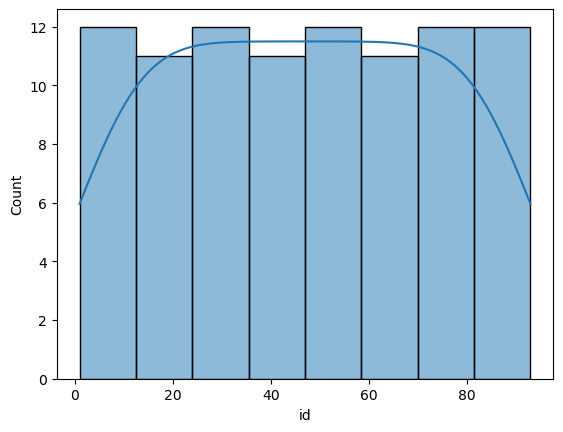

Min.Price


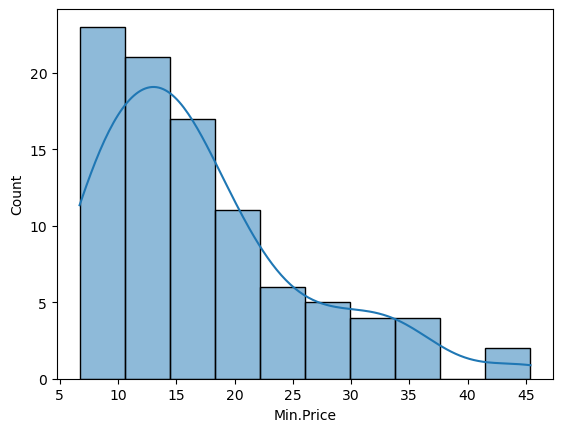

Price


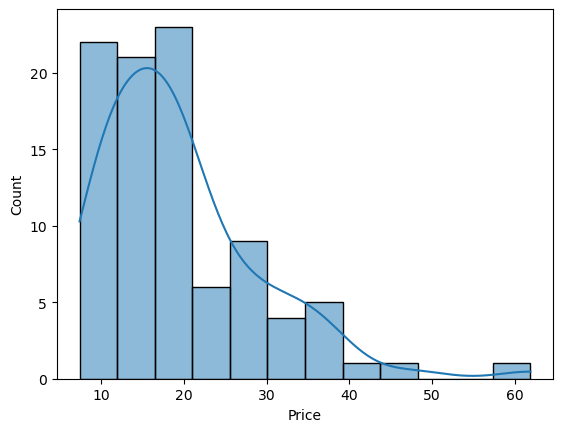

Max.Price


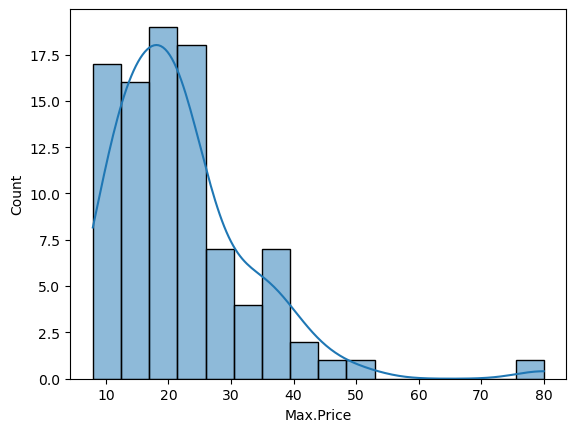

MPG.city


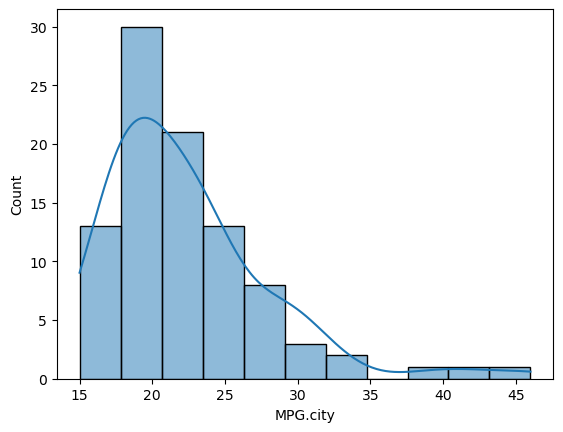

MPG.highway


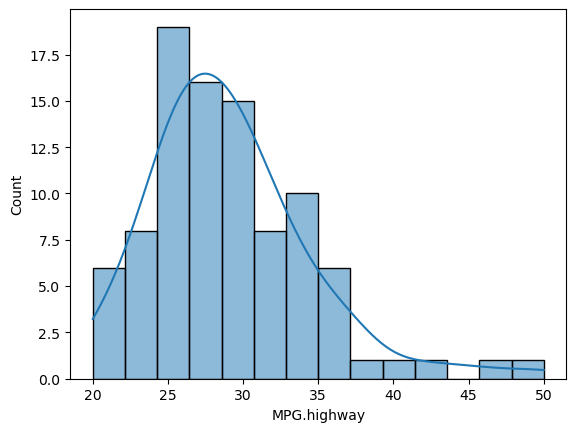

EngineSize


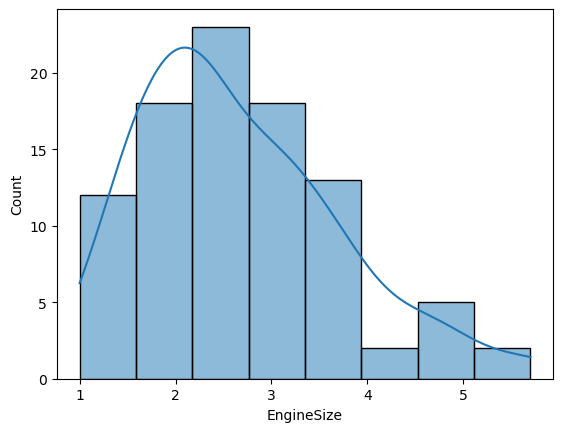

Horsepower


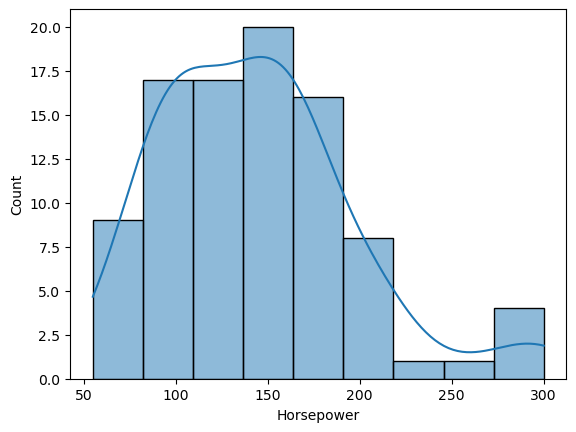

RPM


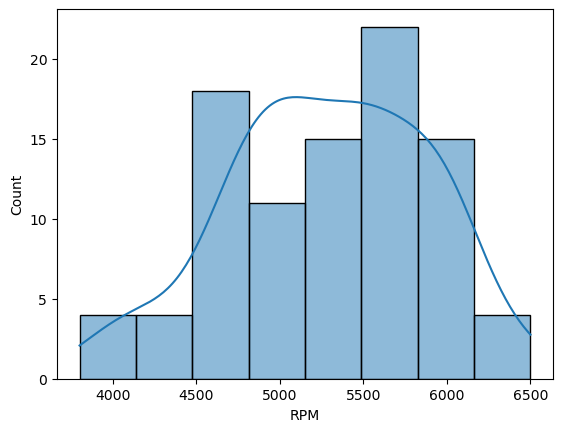

Rev.per.mile


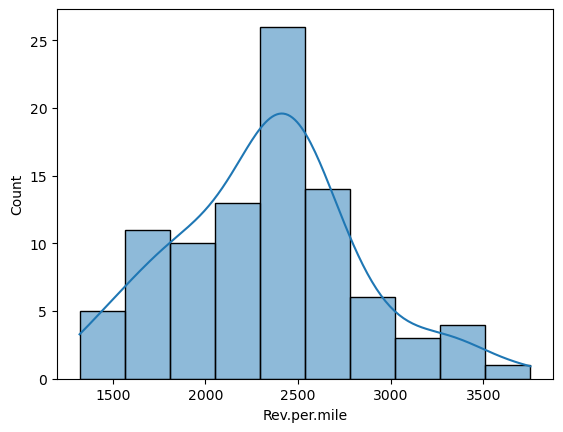

Fuel.tank.capacity


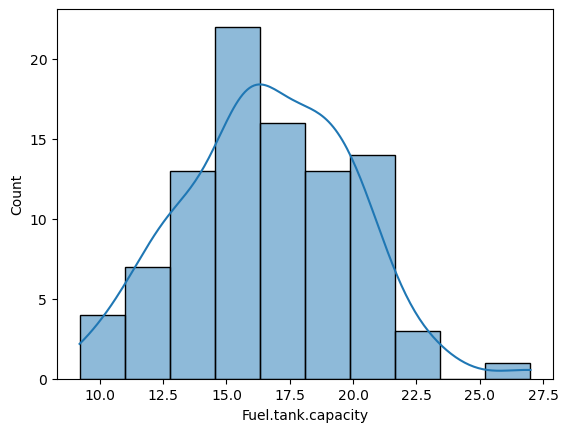

Passengers


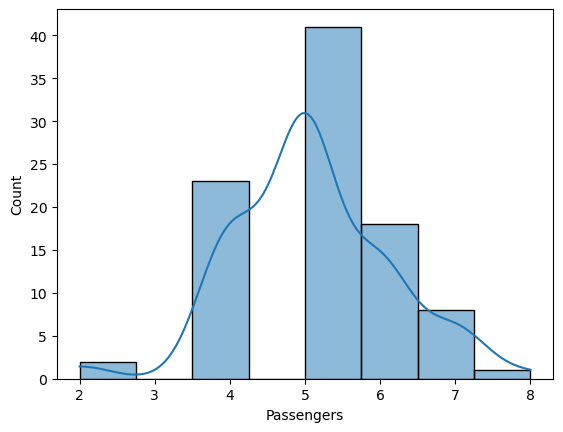

Length


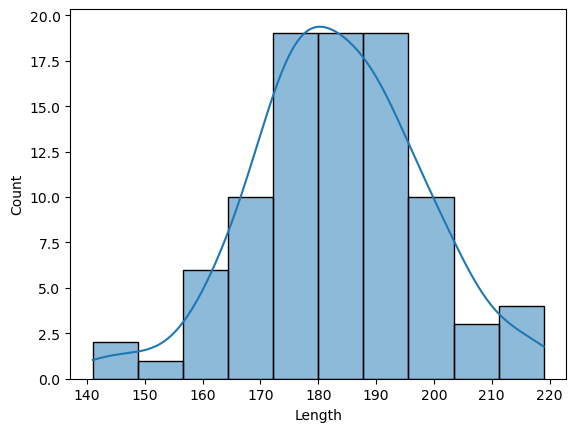

Wheelbase


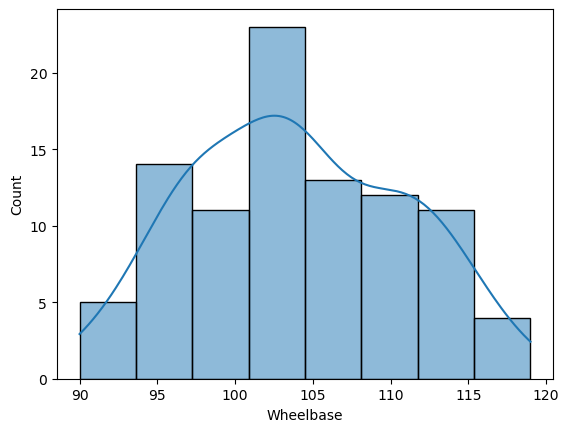

Width


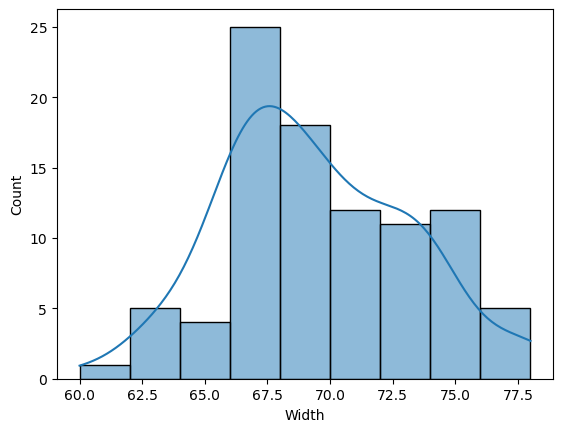

Turn.circle


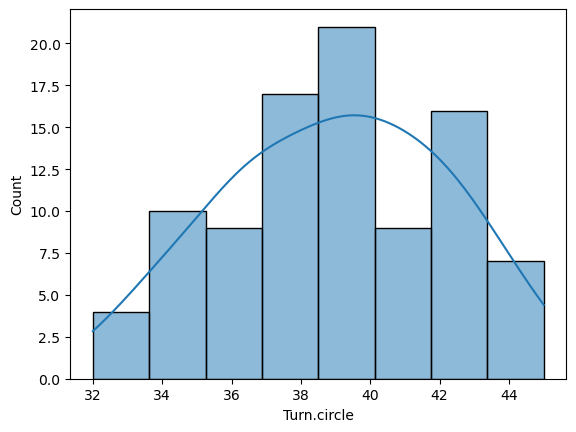

Rear.seat.room


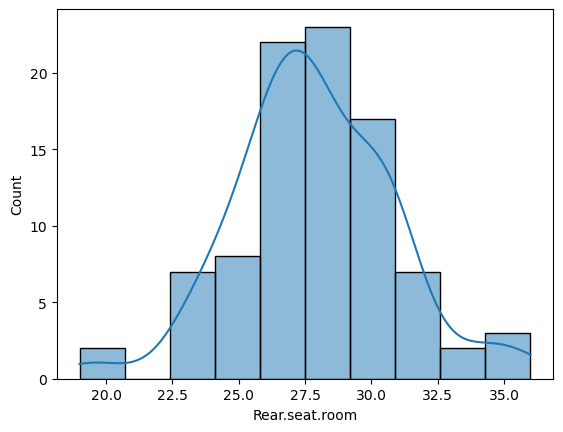

Luggage.room


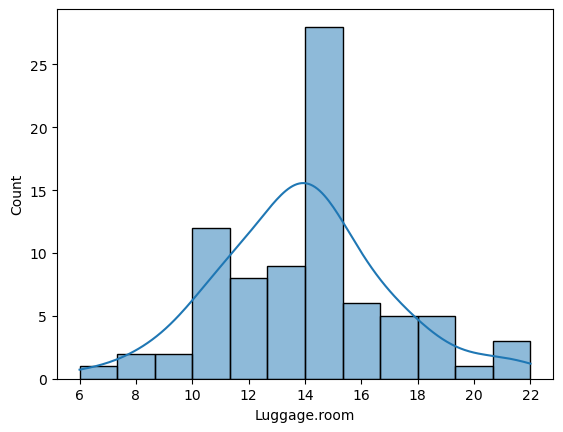

Weight


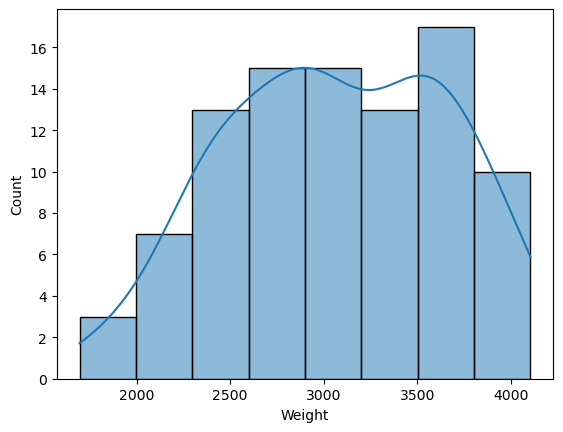

In [395]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.histplot(data=df,x=i,kde=True)
        print(i)
        show()

# box plot

id


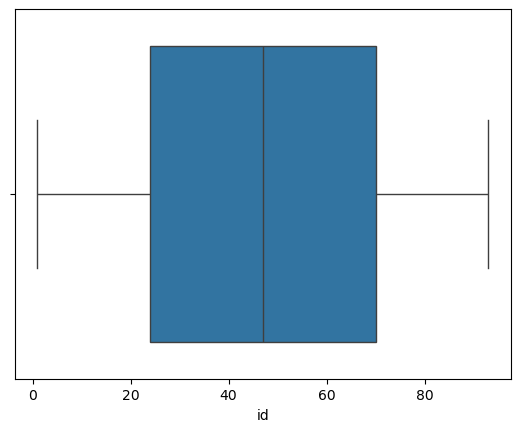

Min.Price


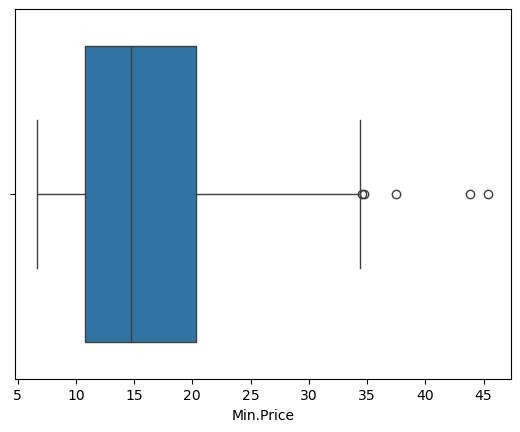

Price


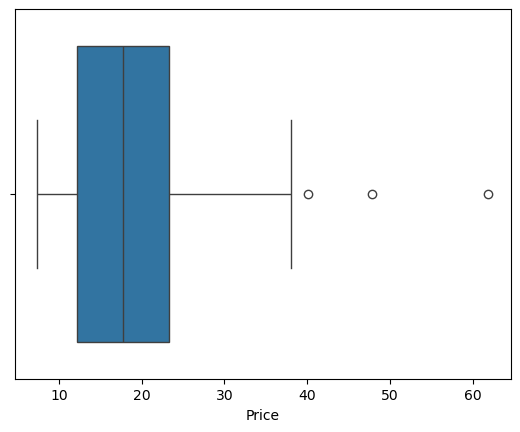

Max.Price


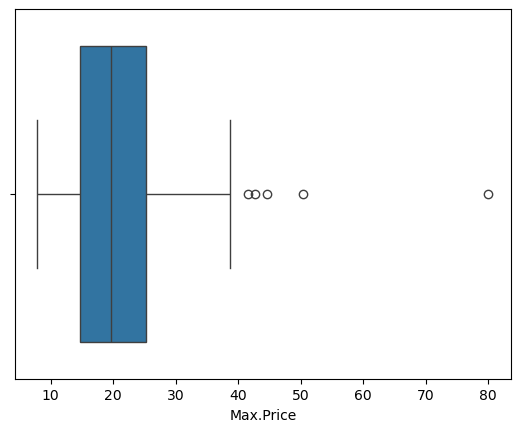

MPG.city


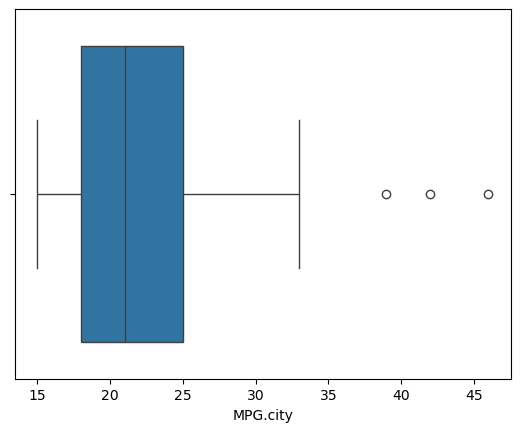

MPG.highway


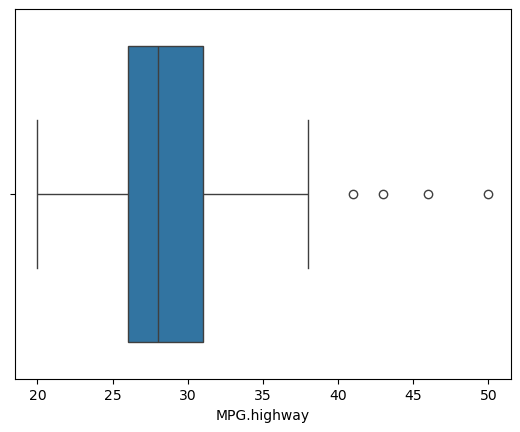

EngineSize


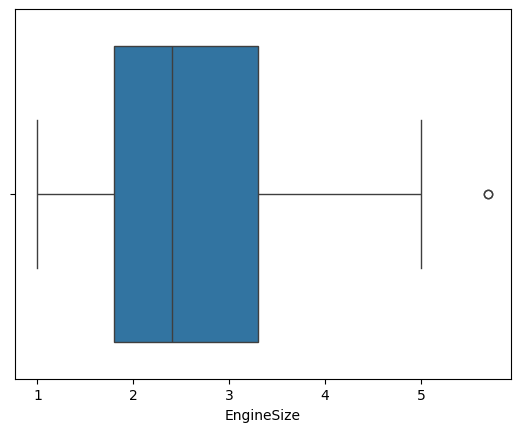

Horsepower


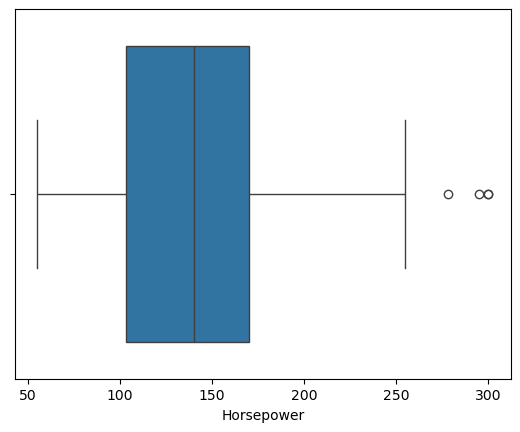

RPM


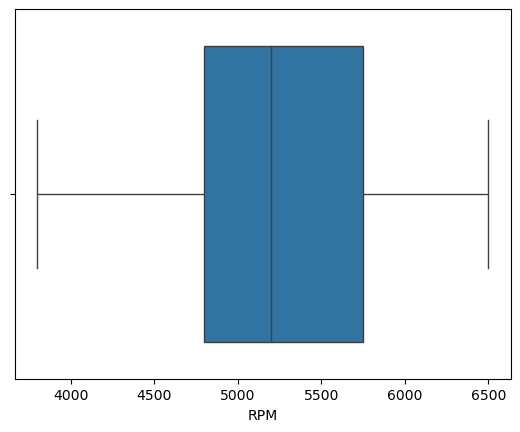

Rev.per.mile


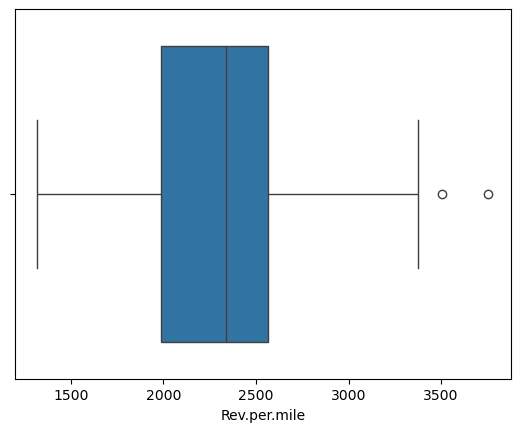

Fuel.tank.capacity


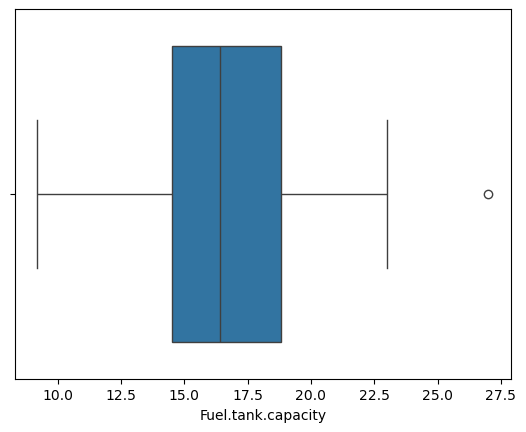

Passengers


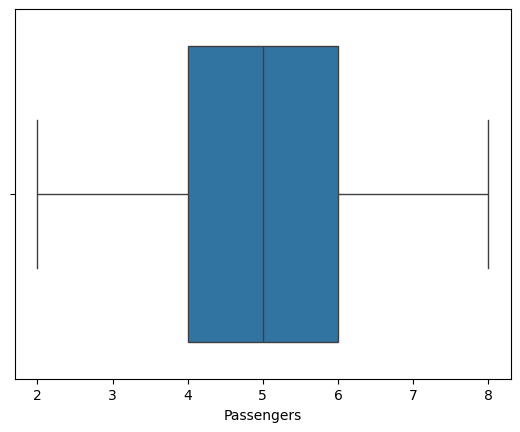

Length


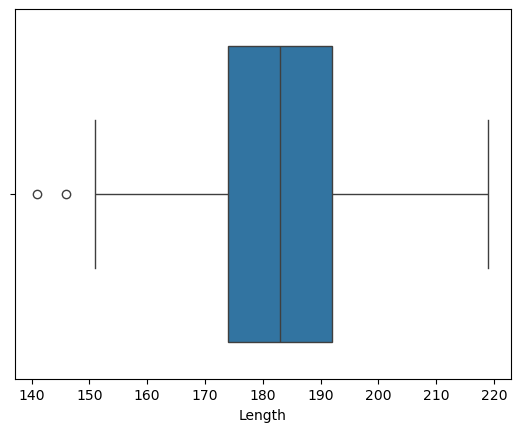

Wheelbase


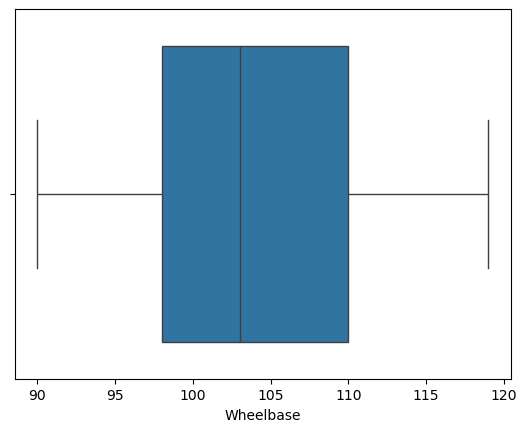

Width


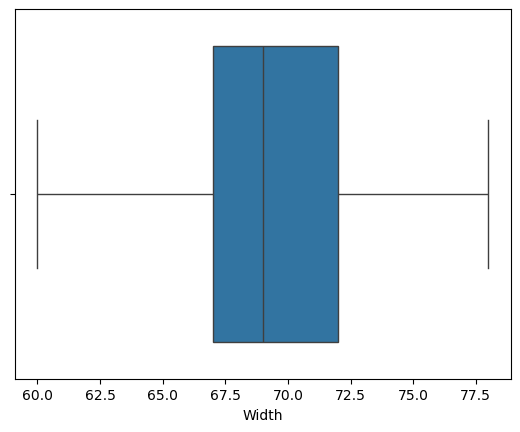

Turn.circle


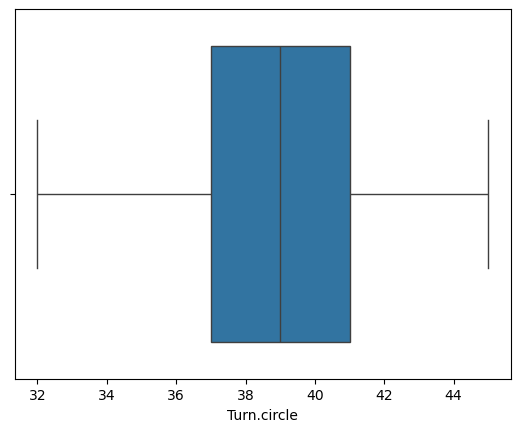

Rear.seat.room


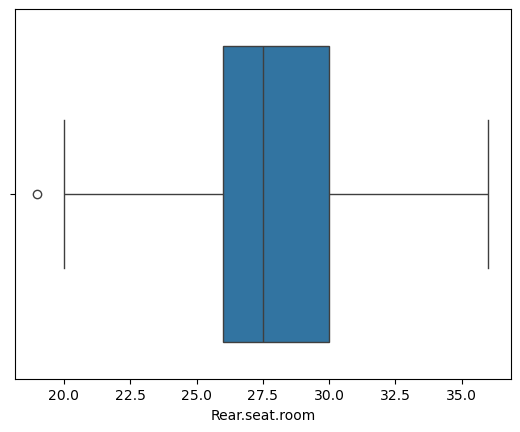

Luggage.room


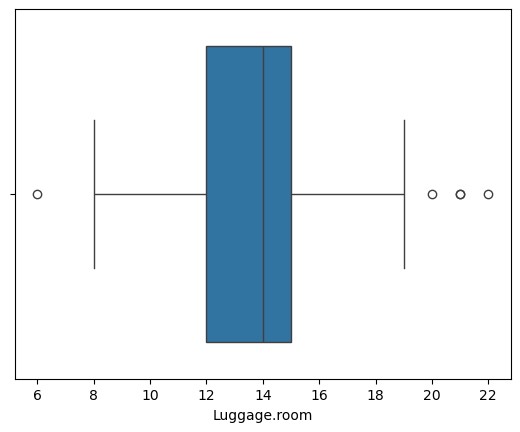

Weight


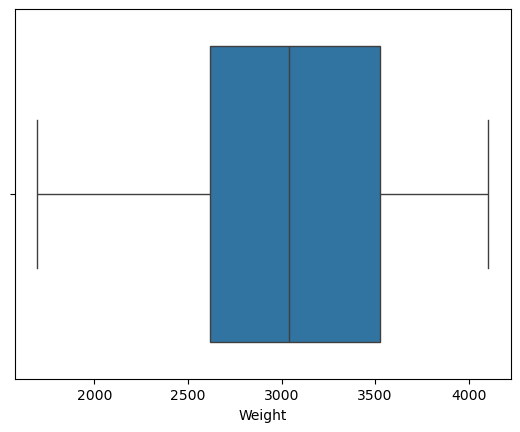

In [397]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.boxplot(data=df,x=i)
        print(i)
        show()

# barchart >> of value counts of categorical columns

Manufacturer


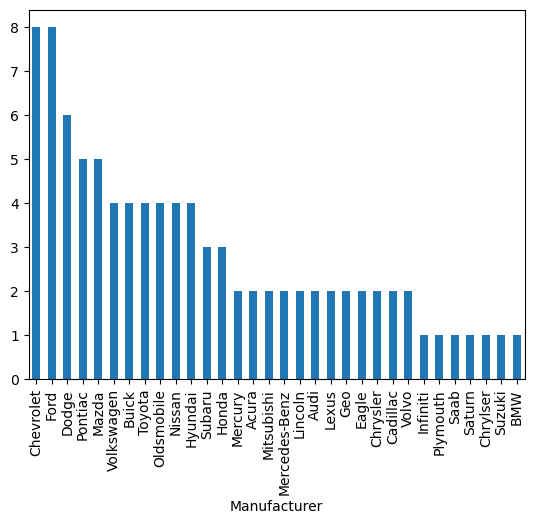

Model


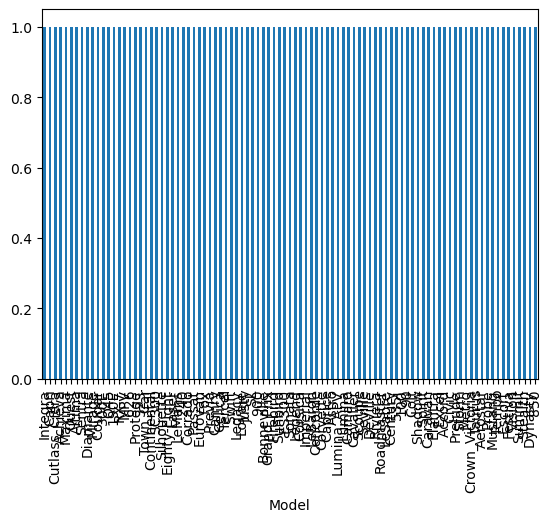

Type


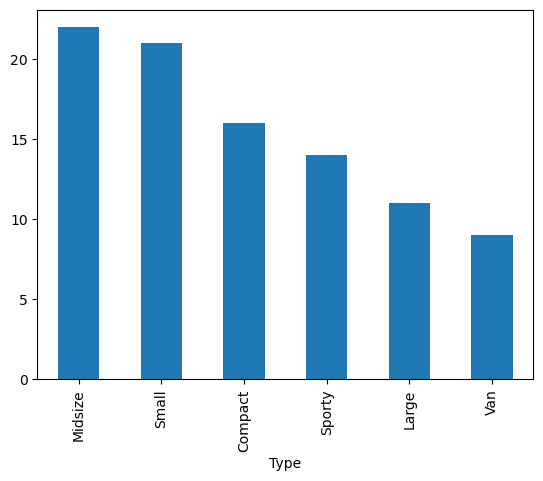

AirBags


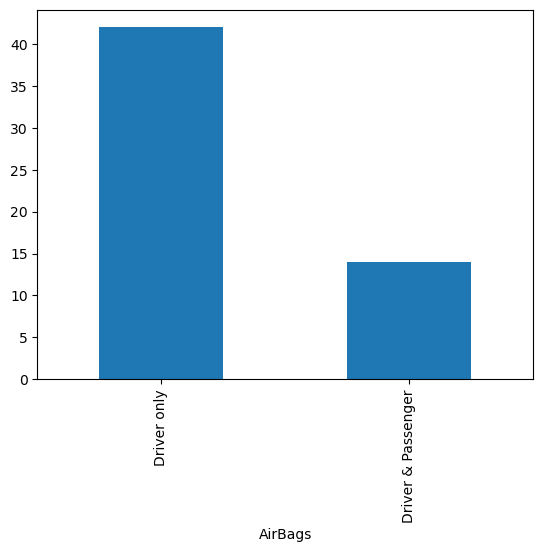

DriveTrain


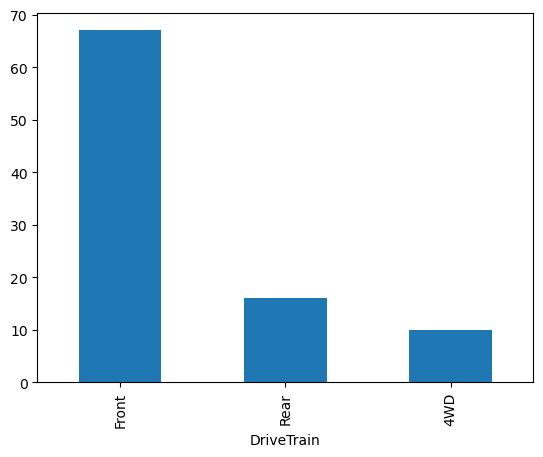

Cylinders


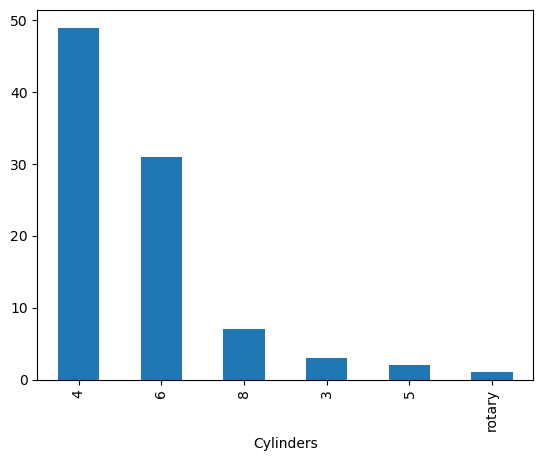

Man.trans.avail


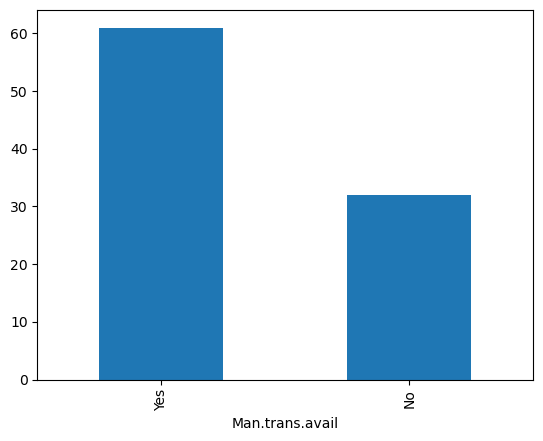

Origin


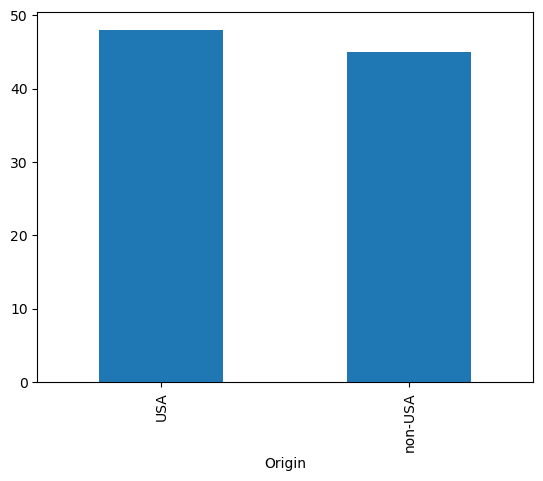

Make


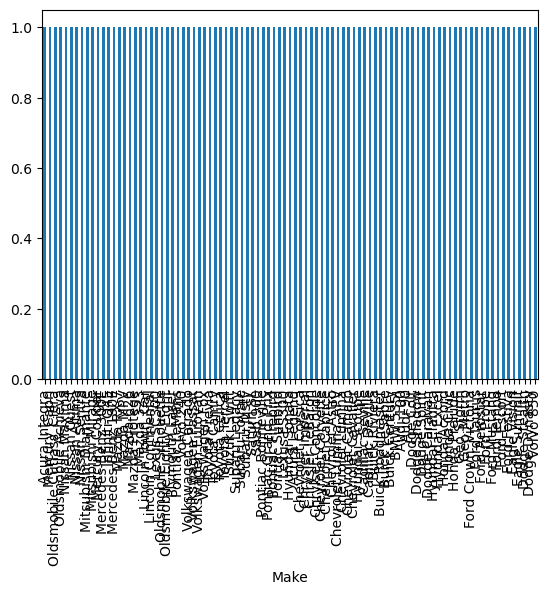

In [399]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i].value_counts().plot(kind='bar')
        print(i)
        show()

## Bivariate analysis >> analysis of input features with output features

## scatterplot

id vs price


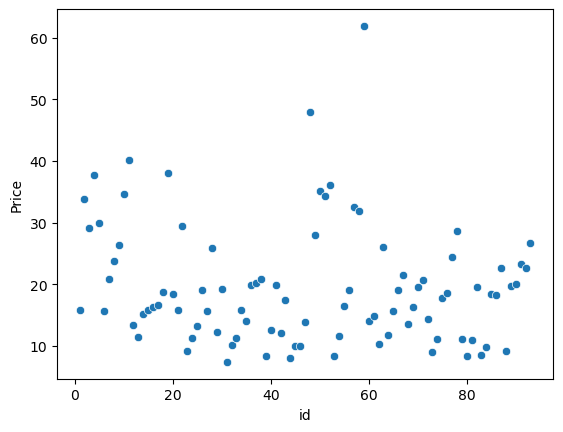

Min.Price vs price


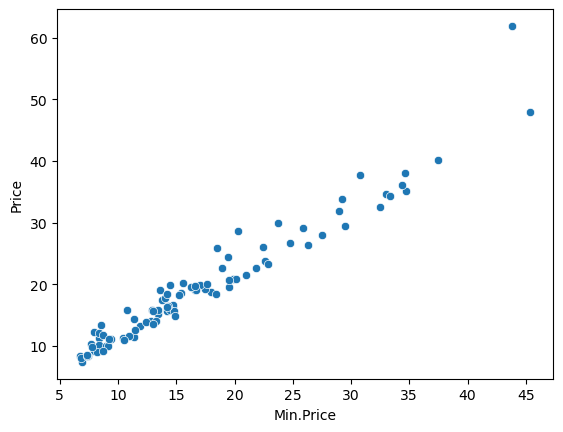

Price vs price


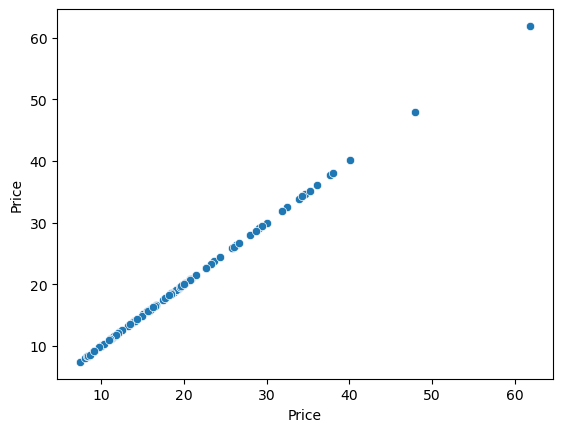

Max.Price vs price


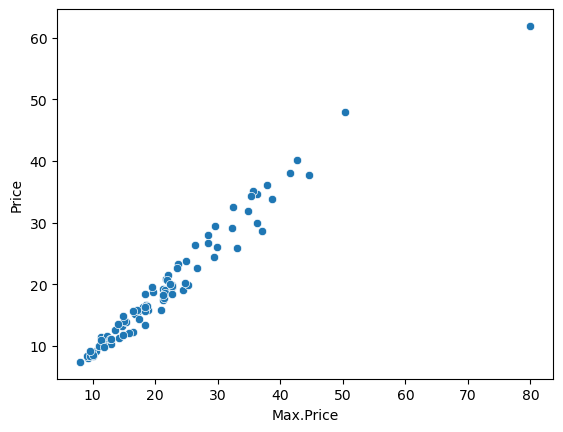

MPG.city vs price


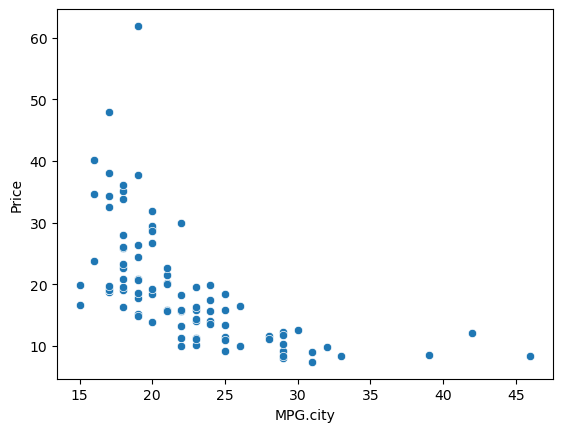

MPG.highway vs price


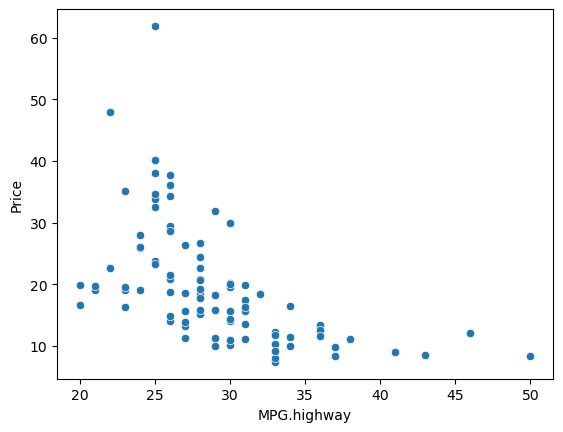

EngineSize vs price


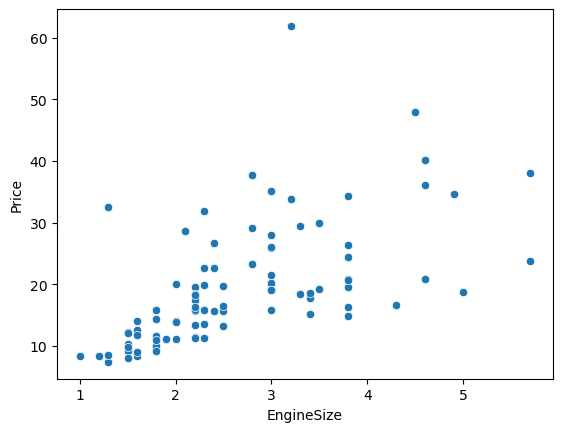

Horsepower vs price


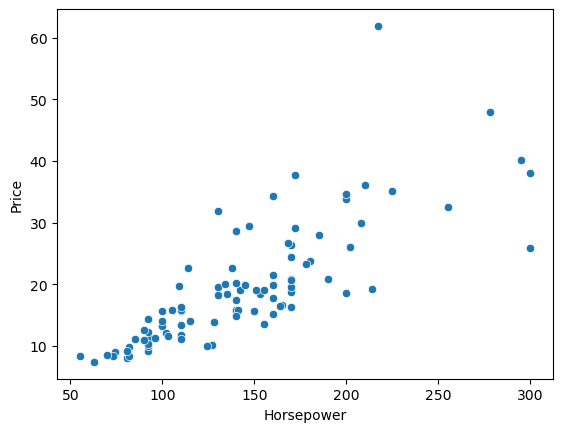

RPM vs price


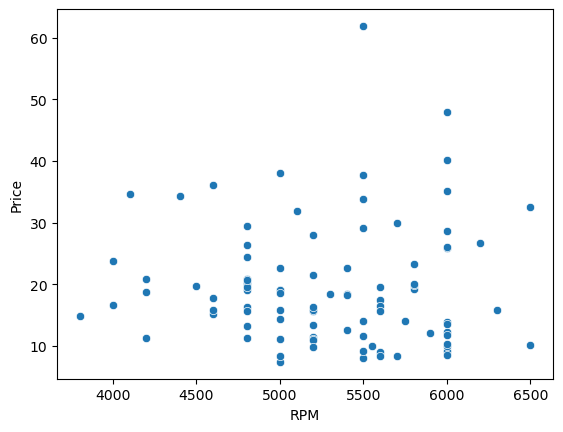

Rev.per.mile vs price


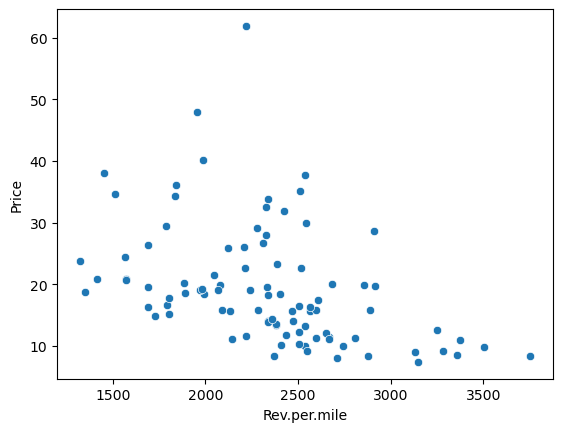

Fuel.tank.capacity vs price


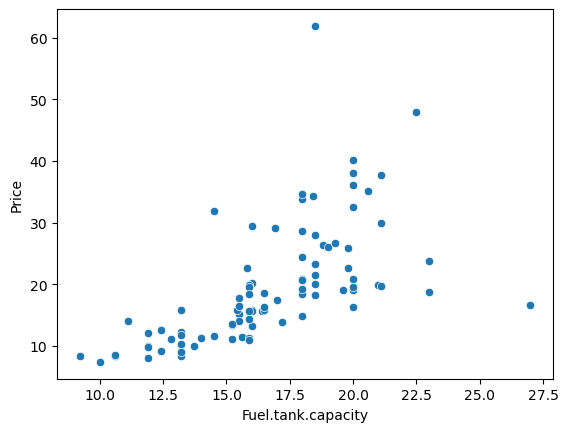

Passengers vs price


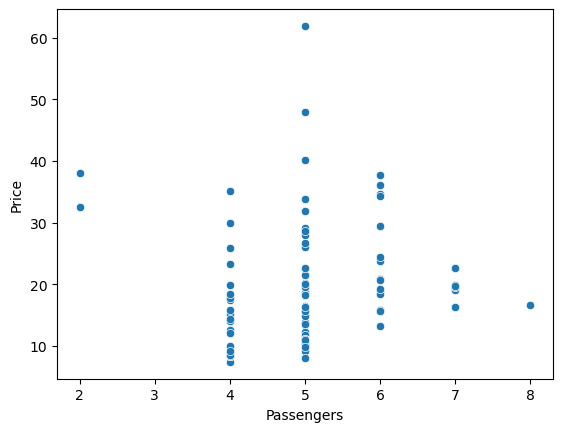

Length vs price


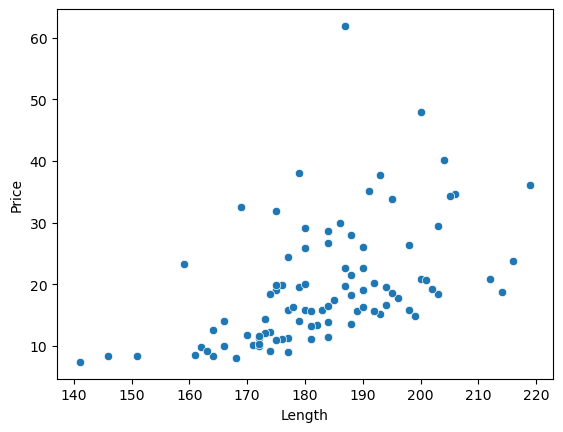

Wheelbase vs price


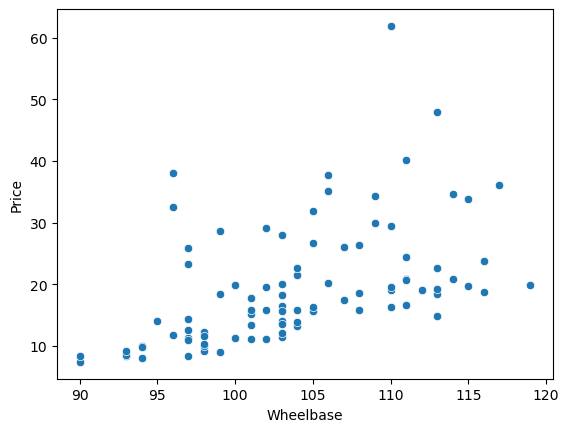

Width vs price


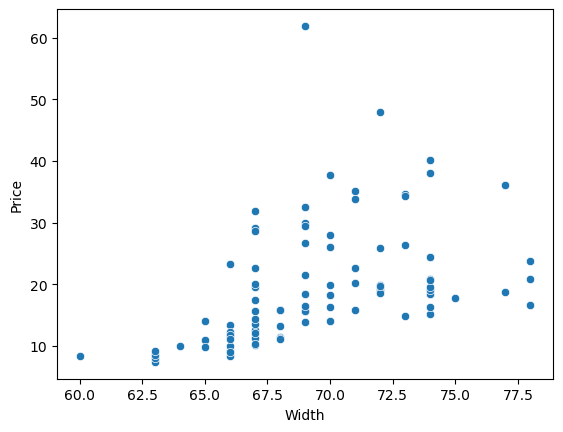

Turn.circle vs price


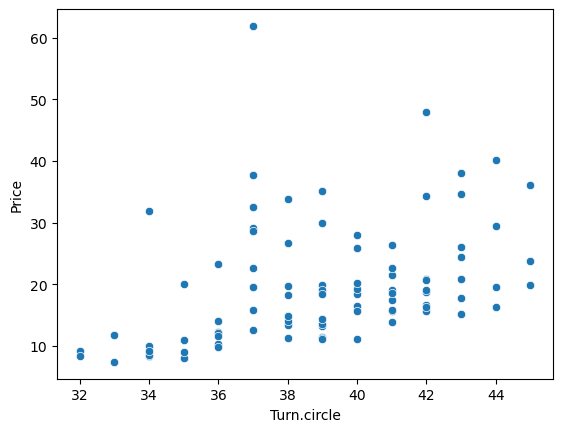

Rear.seat.room vs price


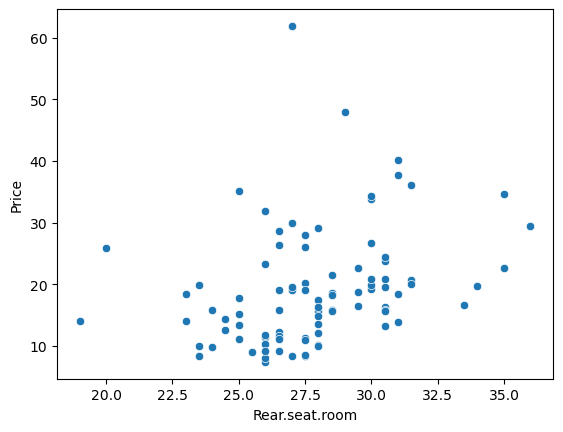

Luggage.room vs price


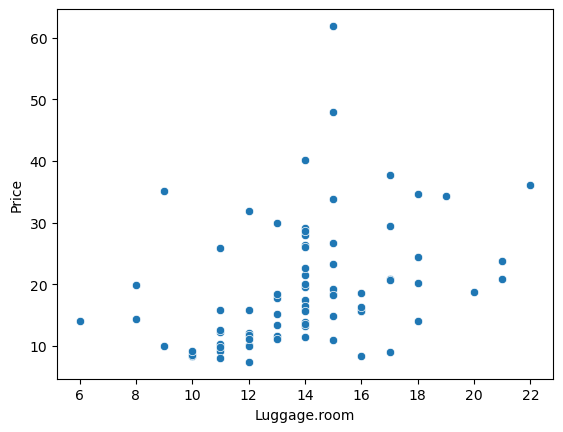

Weight vs price


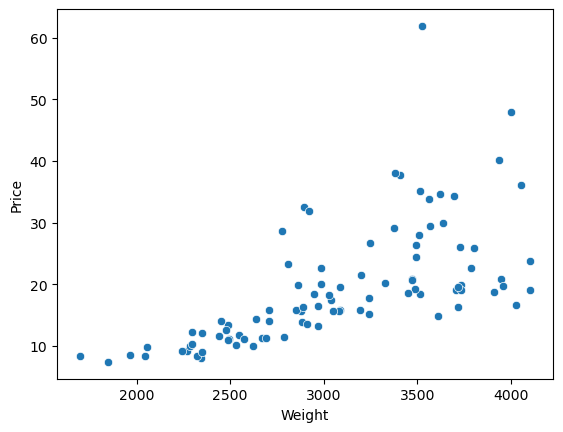

In [403]:
for i in df.columns:
    if df[i].dtypes!=object:
        sns.scatterplot(data=df,x=i,y='Price')
        print(i,'vs price')
        show()

## boxplot >>  to check outliers of categorical columns with output features

outliers in  Manufacturer with price


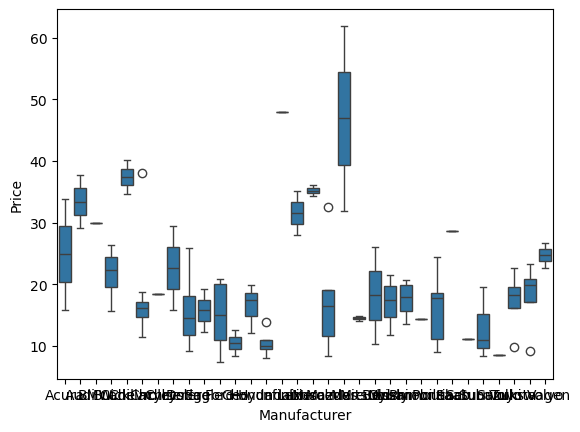

outliers in  Model with price


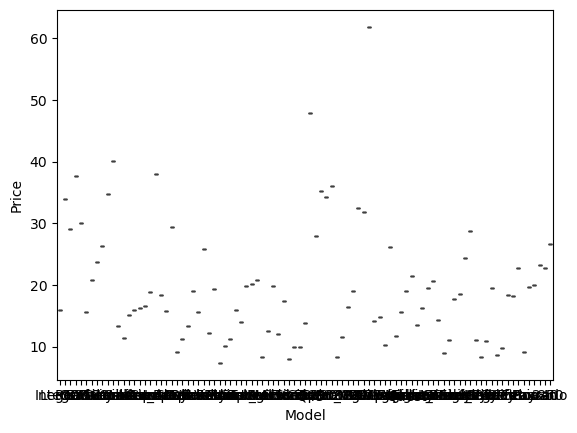

outliers in  Type with price


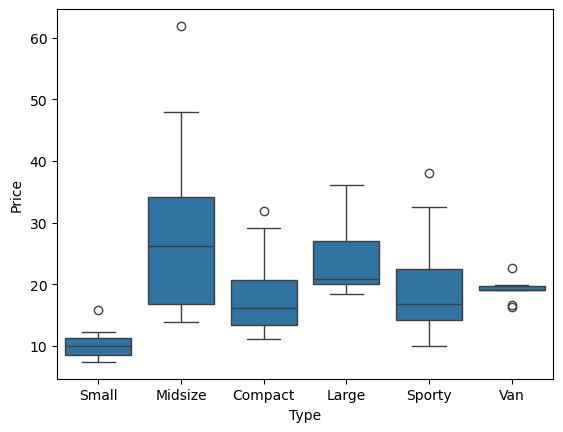

outliers in  AirBags with price


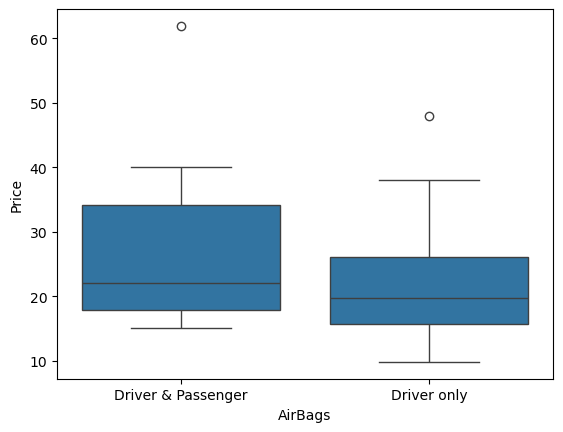

outliers in  DriveTrain with price


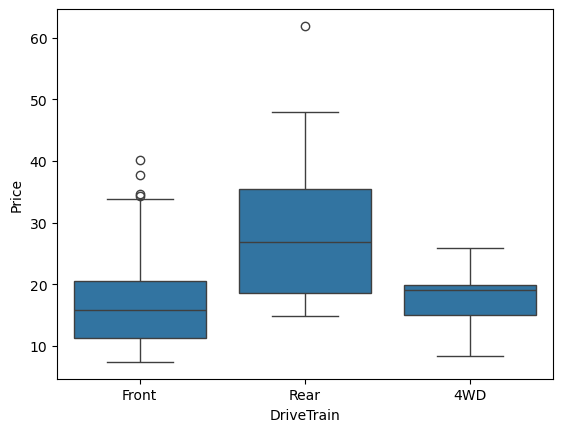

outliers in  Cylinders with price


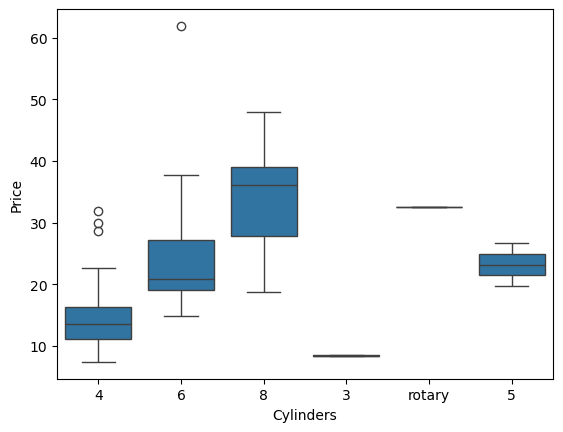

outliers in  Man.trans.avail with price


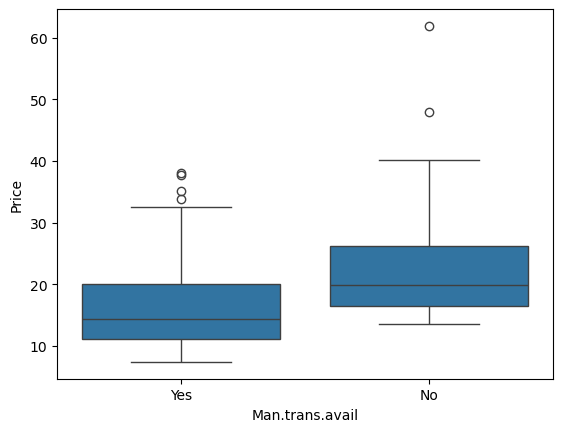

outliers in  Origin with price


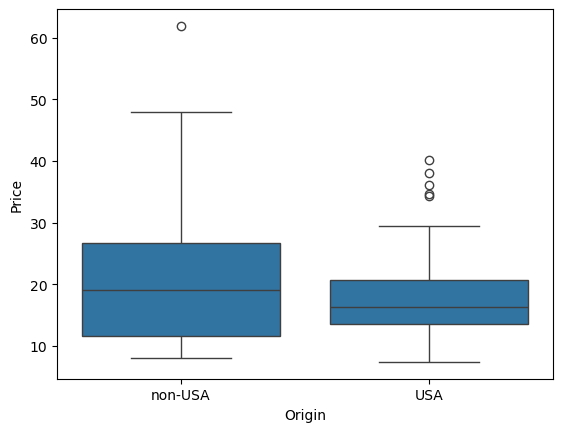

outliers in  Make with price


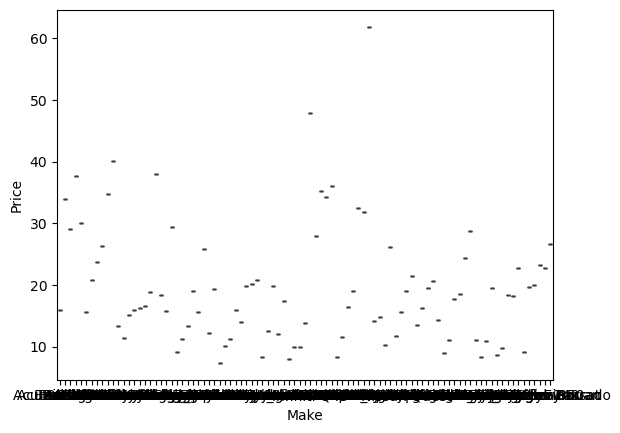

In [405]:
for i in df.columns:
    if df[i].dtypes==object:
        sns.boxplot(data=df,x=i,y='Price')
        print('outliers in ',i,'with price')
        show()

## multivariate analysis 

In [408]:
con = [] 
for i in df.columns:
    if df[i].dtypes!=object:
        con.append(i)

### correlations

In [422]:
df[con].corr()['Price'].sort_values(ascending=False)

Price                 1.000000
Max.Price             0.981580
Min.Price             0.970601
Horsepower            0.788218
Weight                0.647179
Fuel.tank.capacity    0.619480
EngineSize            0.597425
Length                0.503628
Wheelbase             0.500864
Width                 0.456028
Turn.circle           0.392590
Luggage.room          0.366569
Rear.seat.room        0.311499
Passengers            0.057860
RPM                  -0.004955
id                   -0.137277
Rev.per.mile         -0.426395
MPG.highway          -0.560680
MPG.city             -0.594562
Name: Price, dtype: float64

In [413]:
# dropping columns which are not related

In [424]:
cols_to_drop=['Price','id','Width','Turn.circle','Luggage.room','Rear.seat.room','Passengers','RPM','Rev.per.mile']

In [420]:
# priniting heatmap using correlation

<Axes: >

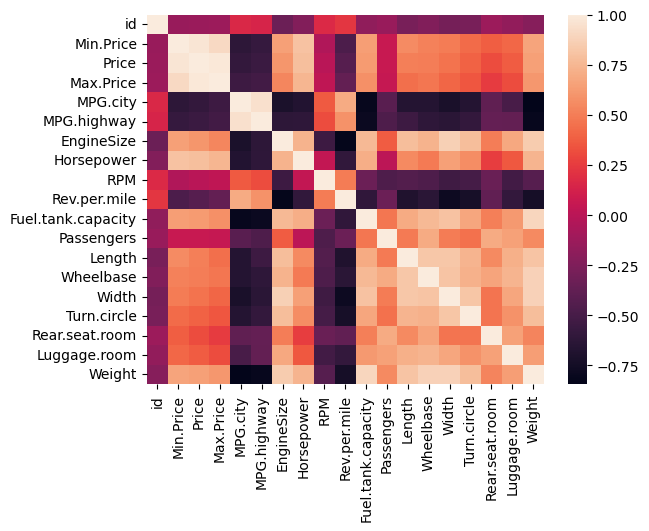

In [426]:
sns.heatmap(df[con].corr())

In [302]:
# printing pairplot

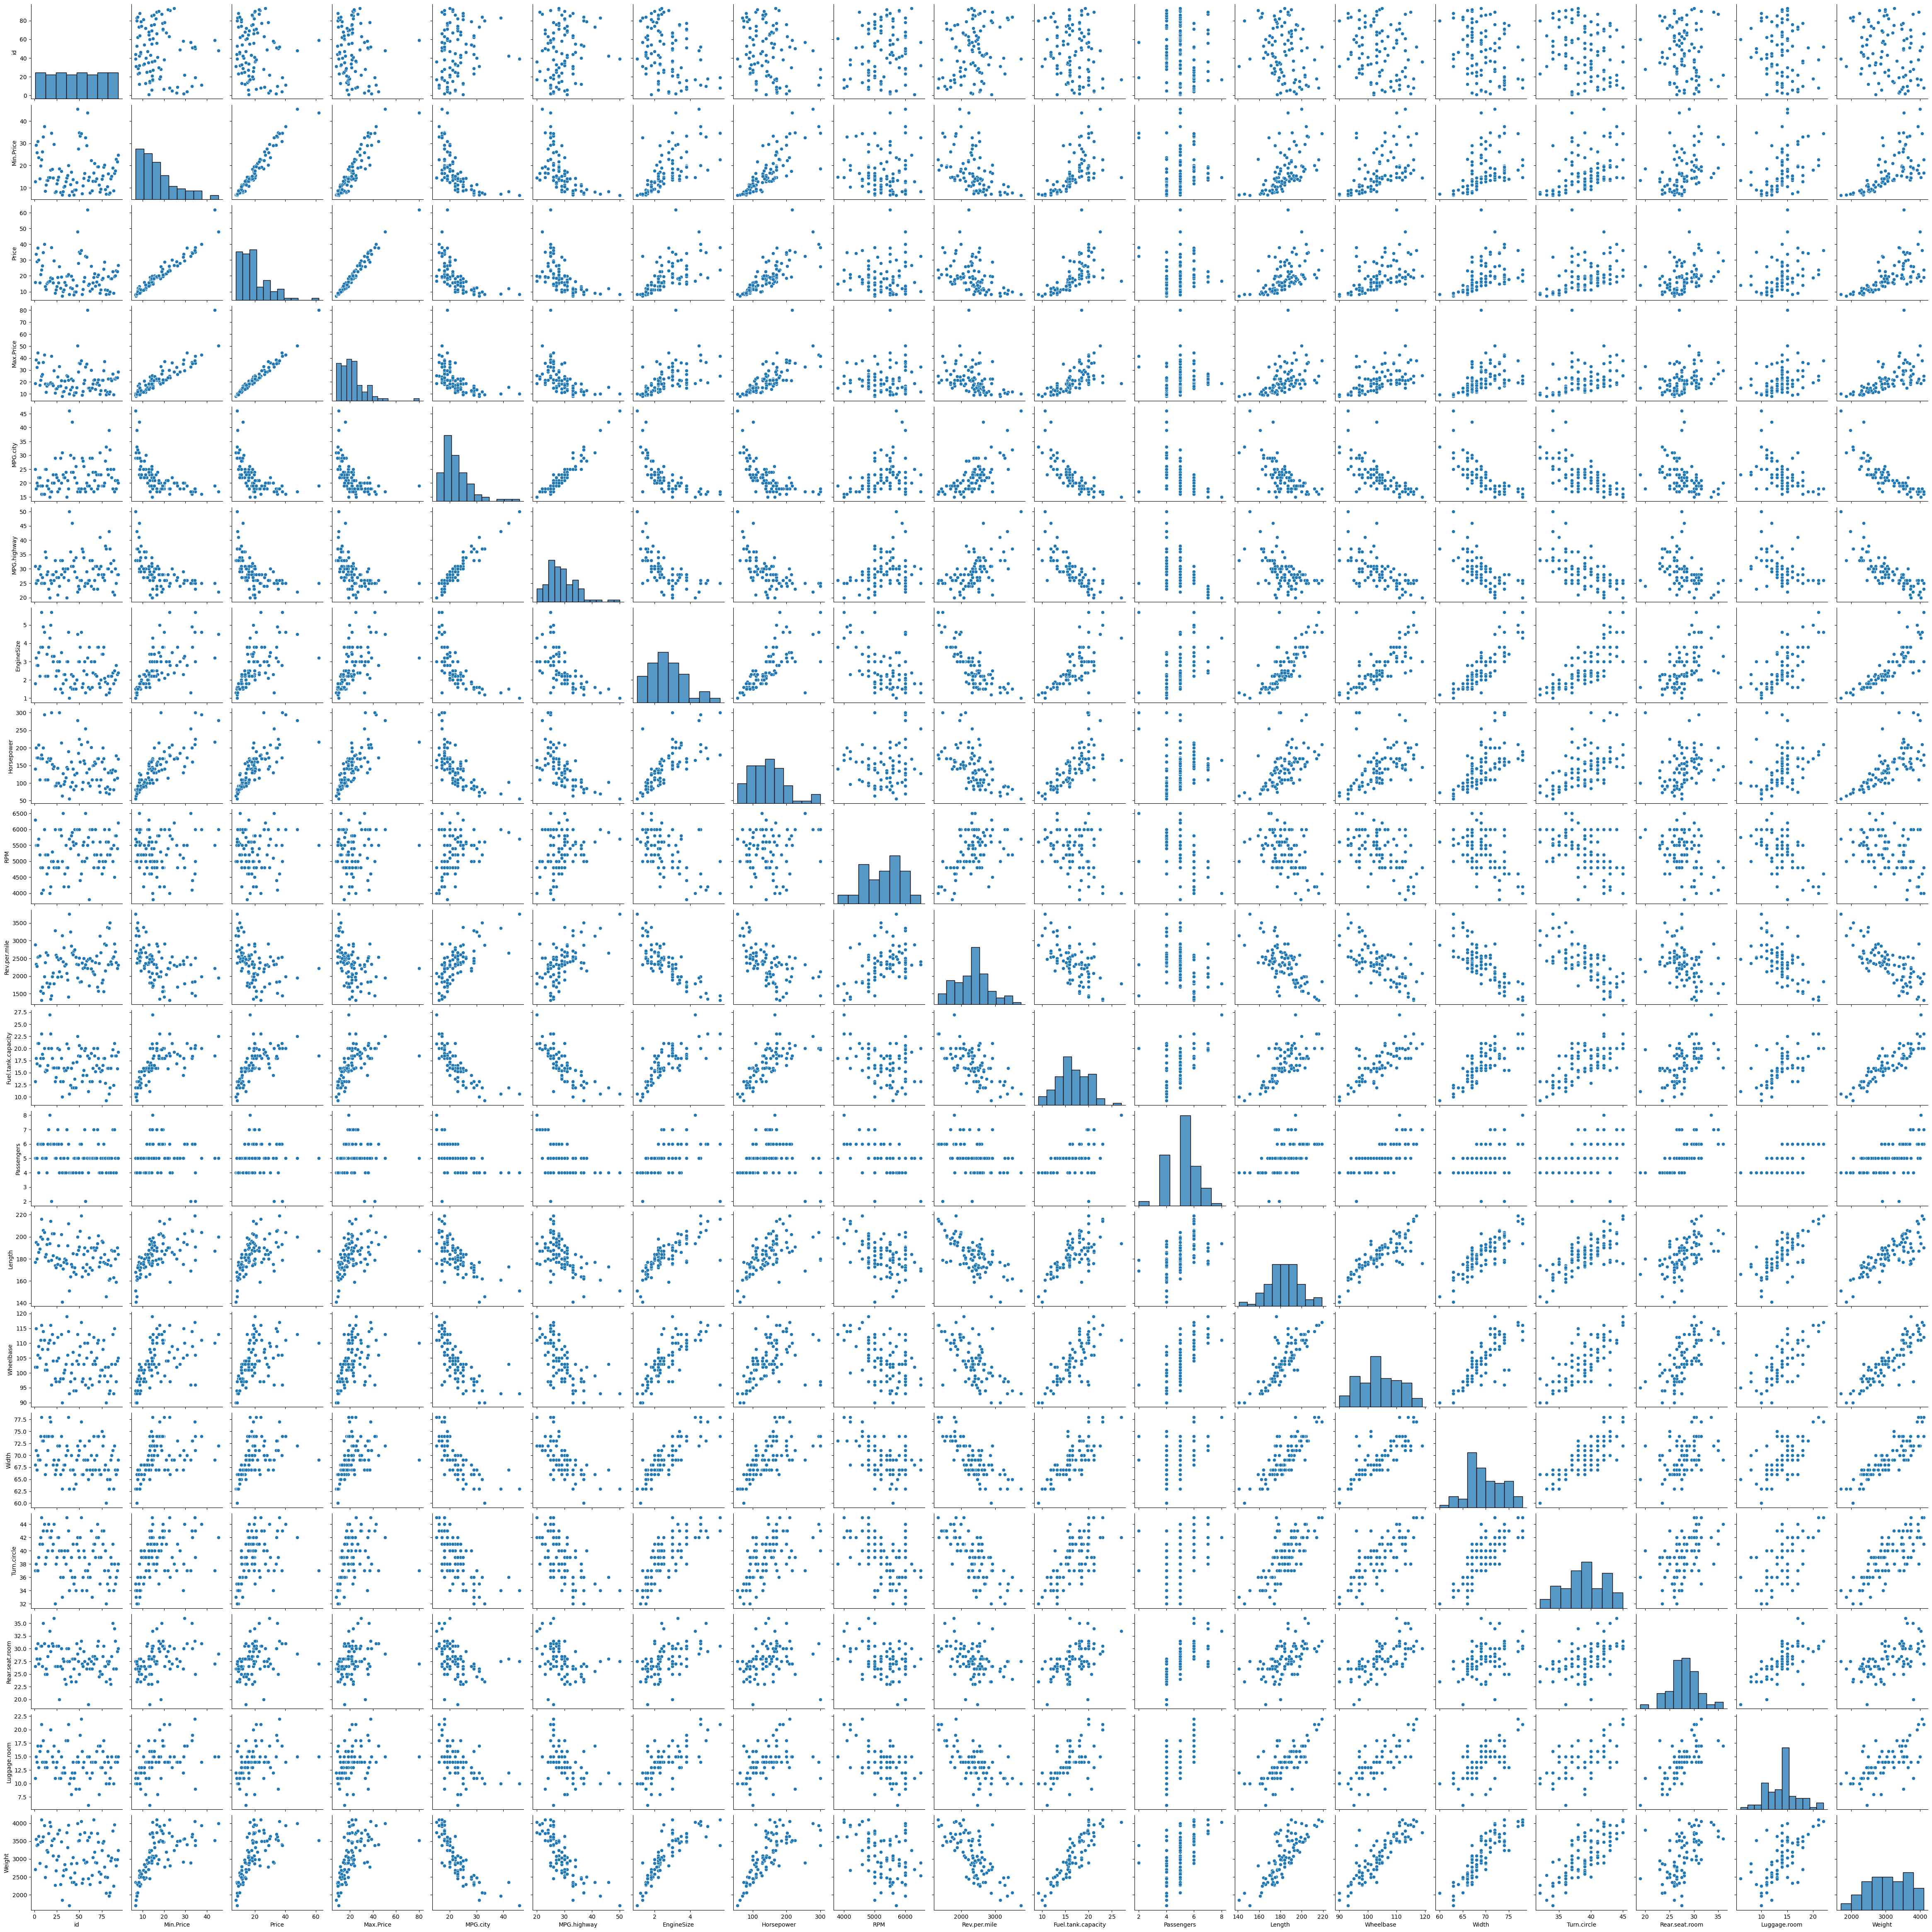

In [428]:
sns.pairplot(df[con])

 # feature engineer

In [325]:
# add both columns to dropping list

In [430]:
# avg_mileage >> average MPG.city and MPG.highway
df['AVG_MPG']=(df['MPG.city'] + df['MPG.highway'])/2

In [431]:
cols_to_drop.extend(['MPG.city','MPG.highway'])

In [432]:
# avg_price = max.price + min.price /2

In [433]:
df['AVG_Price']=(df['Max.Price'] + df['Min.Price'])/2

In [435]:
cols_to_drop.extend(['Max.Price','Min.Price'])

In [441]:
len(cols_to_drop)

13

In [443]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make', 'AVG_MPG', 'AVG_Price'],
      dtype='object')

# null value treatment

In [448]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [450]:
X = df.drop(labels=cols_to_drop,axis=1)
X

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,Man.trans.avail,Fuel.tank.capacity,Length,Wheelbase,Weight,Origin,Make,AVG_MPG,AVG_Price
0,Acura,Integra,Small,Driver only,Front,4,1.8,140,Yes,13.2,177,102,2705,non-USA,Acura Integra,28.0,15.85
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,3.2,200,Yes,18.0,195,115,3560,non-USA,Acura Legend,21.5,33.95
2,Audi,90,Compact,Driver only,Front,6,2.8,172,Yes,16.9,180,102,3375,non-USA,Audi 90,23.0,29.10
3,Audi,100,Midsize,Driver only,Front,6,2.8,172,Yes,21.1,193,106,3405,non-USA,Audi 100,22.5,37.70
4,BMW,535i,Midsize,Driver only,Rear,4,3.5,208,Yes,21.1,186,109,3640,non-USA,BMW 535i,26.0,29.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,Driver only,Front,5,2.5,109,Yes,21.1,187,115,3960,non-USA,Volkswagen Eurovan,19.0,19.65
89,Volkswagen,Passat,Compact,Driver only,Front,4,2.0,134,Yes,18.5,180,103,2985,non-USA,Volkswagen Passat,25.5,20.00
90,Volkswagen,Corrado,Sporty,Driver only,Front,6,2.8,178,Yes,18.5,159,97,2810,non-USA,Volkswagen Corrado,21.5,23.30
91,Volvo,240,Compact,Driver only,Rear,4,2.3,114,Yes,15.8,190,104,2985,non-USA,Volvo 240,24.5,22.65


In [452]:
cat = []
con = []

for i in X.columns:
    if X[i].dtypes==object:
        cat.append(i)
    else:
        con.append(i)
    

In [454]:
Xcat = X [cat]
Xcon = X [con]

In [458]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [460]:
le = LabelEncoder()
ss = StandardScaler()

In [462]:
for i in Xcat.columns:
    Xcat[i]=le.fit_transform(Xcat[i])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xcat[i]=le.fit_transform(Xcat[i])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13020\188807692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [464]:
Xcon=pd.DataFrame(ss.fit_transform(Xcon),columns=con)

In [466]:
X = Xcon.join(Xcat)
X

,EngineSize,Horsepower,Fuel.tank.capacity,Length,Wheelbase,Weight,AVG_MPG,AVG_Price,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,-0.841022,-0.073484,-1.062184,-0.427186,-0.286932,-0.627055,0.423545,-0.381255,0,48,3,1,1,1,1,1,0
1,0.515869,1.078322,0.409445,0.812171,1.629649,0.830208,-0.787013,1.502970,0,55,2,0,1,3,1,1,1
2,0.128186,0.540813,0.072197,-0.220626,-0.286932,0.514894,-0.507653,0.998081,1,8,0,1,1,3,1,1,3
3,0.128186,0.540813,1.359872,0.674465,0.302785,0.566026,-0.600773,1.893348,1,0,2,1,1,3,1,1,2
4,0.806631,1.231897,1.359872,0.192493,0.745073,0.966560,0.051066,1.086566,2,5,2,1,2,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,-0.162577,-0.668585,1.359872,0.261346,1.629649,1.511968,-1.252612,0.014328,30,41,5,1,1,2,1,1,88
89,-0.647181,-0.188665,0.562740,-0.220626,-0.139503,-0.149822,-0.042054,0.050763,30,64,0,1,1,1,1,1,90
90,0.128186,0.655993,0.562740,-1.666543,-1.024079,-0.448092,-0.787013,0.394296,30,28,4,1,1,3,1,1,87
91,-0.356418,-0.572601,-0.265051,0.467905,0.007926,-0.149822,-0.228294,0.326630,31,2,0,1,2,1,1,1,91


In [468]:
out = []

for i in Xcon.columns:
    o = Xcon[(Xcon[i]<-3)|(Xcon[i]>3)].index
    out.extend(o)

In [470]:
a = list(set(out))
a

[16, 41, 58, 38]

In [472]:
X = X.drop(index=a,axis=0)
Y = Y.drop(index=a,axis=0)

In [474]:
X.index=range(X.shape[0])
Y.index=range(Y.shape[0])

In [477]:
from sklearn.model_selection import train_test_split

In [481]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [89, 83]